In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, train_test_split, StratifiedKFold
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

sns.set_style('darkgrid')
plt.rc('figure', figsize=(14, 8), dpi=200)

In [ ]:
df = pd.read_csv('sample_data/winequality-red.csv')
df # wyświetlenie danych

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol quality  
0         9.4    poor  
1         9.8    poor  
2         9.8    poor  
3         9.8  medium  
4         9.4    poor  
...       ...     ...  
1594     10.5    poor  
1595     11.2  medium  
1596     11.0  medium  
1597     10.2    poor  
1598     11.0  medium  

[1599 rows x 12 columns]

In [ ]:
X = df.drop('quality', axis=1)  # atrybuty
y = df['quality']  # klasa decyzyjna

# Normalizacja danych do zakresu [0, 1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

X_normalized.head() # Wyświetlenie kilku pierwszych wierszy znormalizowanych danych

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  
0  0.153846  
1  0.215385  
2  0.215385  
3  0.215385  
4  0.153846

In [ ]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_normalized)

# Podział na zbiór treningowy i testowy z zachowaniem proporcji klas
X_train, X_test, y_train, y_test = train_test_split(
    X_standardized, y, test_size=0.3, random_state=42, stratify=y
)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

print("Rozmiar zbioru treningowego:", X_train.shape)
print("Rozmiar zbioru testowego:", X_test.shape)

Rozmiar zbioru treningowego: (1119, 11)
Rozmiar zbioru testowego: (480, 11)


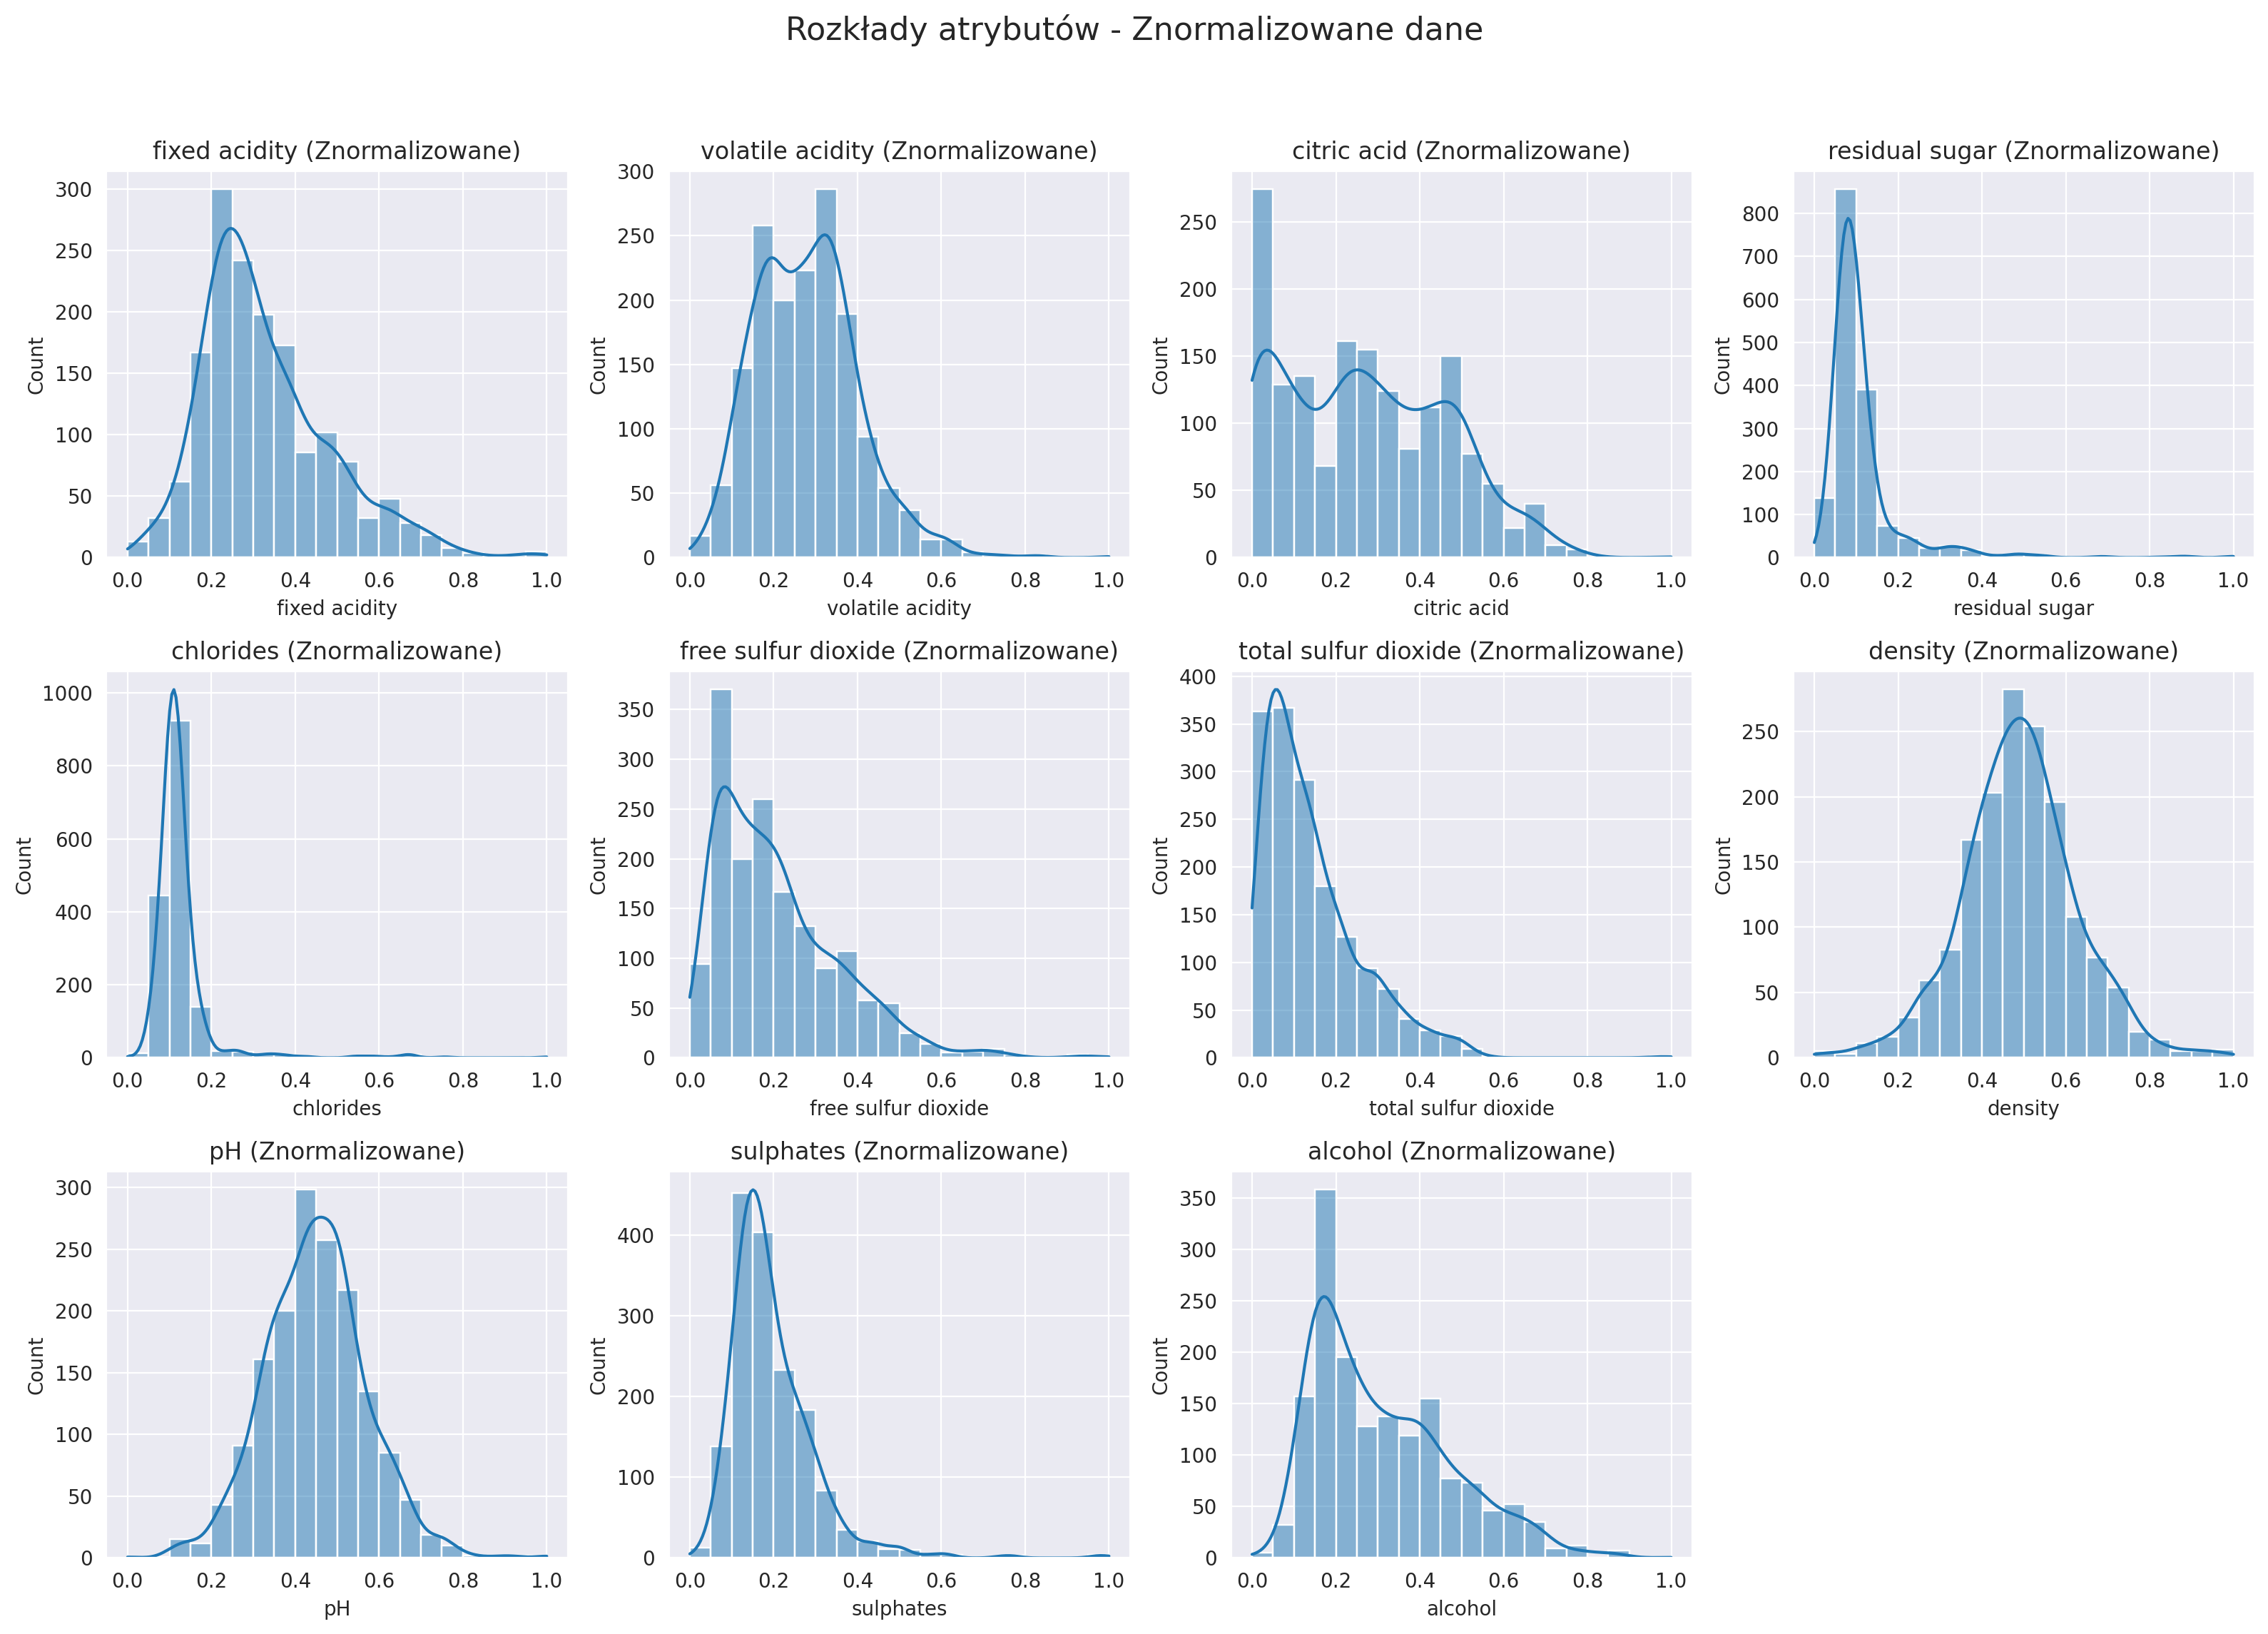

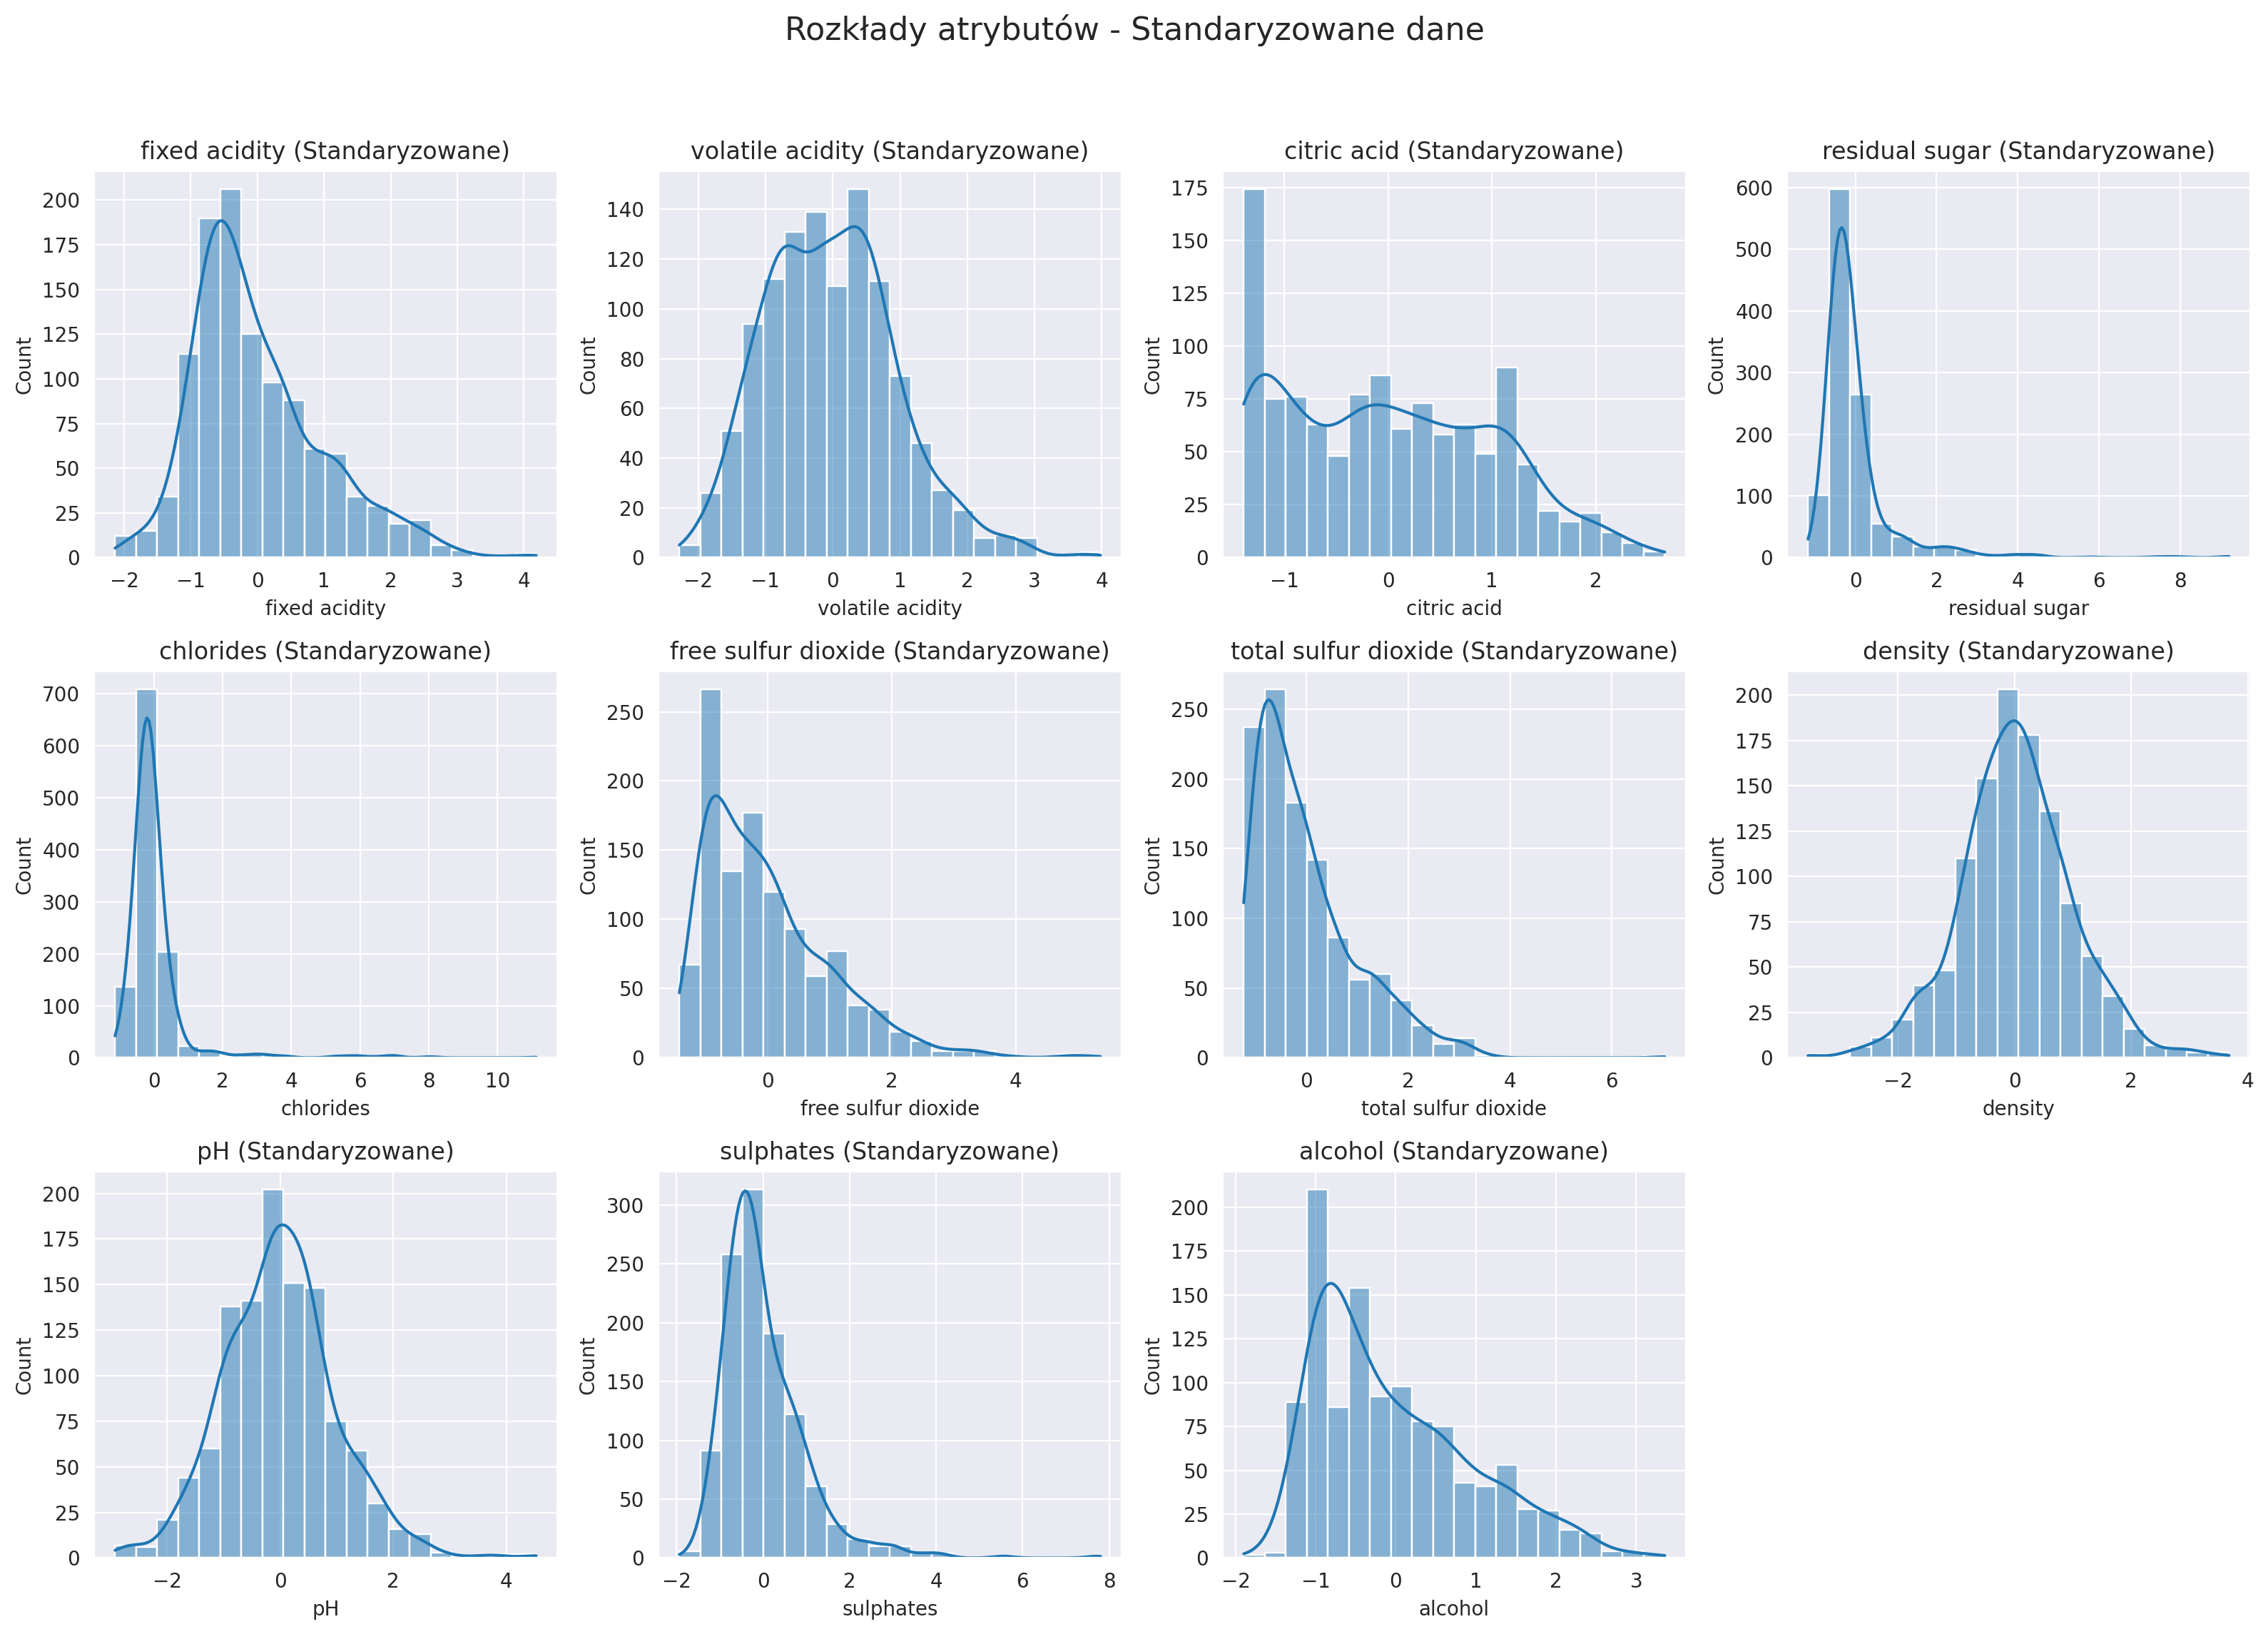

In [ ]:
# Tworzenie wykresów dla znormalizowanych danych
plt.figure(figsize=(16, 12))
plt.suptitle("Rozkłady atrybutów - Znormalizowane dane", fontsize=16)

for i, column in enumerate(X_normalized.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(X_normalized[column], bins=20, kde=True)
    plt.title(f"{column} (Znormalizowane)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Tworzenie wykresów dla standaryzowanych danych
plt.figure(figsize=(16, 12))
plt.suptitle("Rozkłady atrybutów - Standaryzowane dane", fontsize=16)

for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(X_train[column], bins=20, kde=True)
    plt.title(f"{column} (Standaryzowane)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

  0%|          | 0/35 [00:00<?, ?it/s]

Najlepsze k = 1


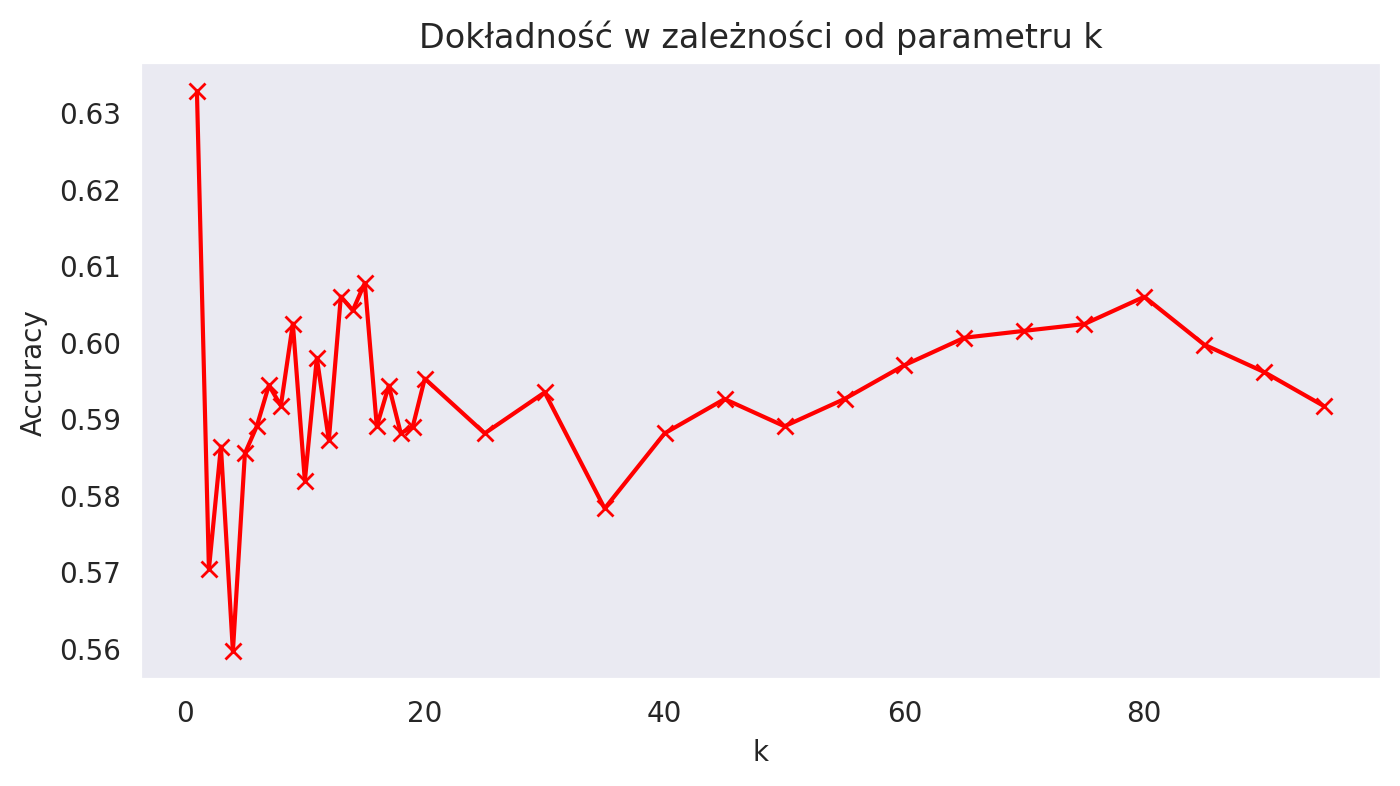

In [ ]:
def knn_score_cv(k, X_train, y_train, cv=10, metric='accuracy'):
    knn = KNeighborsClassifier(n_neighbors=k)
    stratified_cv = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    cv_results = cross_validate(knn, X_train, y_train, cv=stratified_cv, scoring=metric)
    return np.mean(cv_results['test_score'])

all_k = list(range(1, 20)) + list(range(20, 100, 5))
scores = []

# Testowanie różnych wartości k
for k in tqdm(all_k):
    score = knn_score_cv(k, X_train, y_train)
    scores.append((k, score))

# wyniki jako numpy array
scores = np.array(scores)
best_k = int(scores[np.argmax(scores[:, 1]), 0])

print('Najlepsze k =', best_k)

# Wykres dokładności w zależności od wartości k
plt.figure(figsize=(8, 4))
plt.plot(scores[:, 0], scores[:, 1], linestyle='-', marker='x', color='r')
plt.title('Dokładność w zależności od parametru k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1) # Inicjalizacja modelu k-NN z k=1

knn.fit(X_train, y_train) # Trenowanie
y_pred = knn.predict(X_test)  # Predykcja
# Obliczenie dokładności
accuracy = accuracy_score(y_test, y_pred) * 100
print("Dokładność modelu na zbiorze testowym przy k równym 1:", round(accuracy,2),  '%')

Dokładność modelu na zbiorze testowym przy k równym 1: 67.08 %
